In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load and preprocess data
data = pd.read_csv('kerala_traffic_accident_hotspot_dataset.csv')

In [2]:
data

,Accident_ID,Latitude,Longitude,Date,Time,Day_of_Week,Traffic_Volume,Road_Type,Speed_Limit,Weather_Condition,Visibility,Lighting_Condition,Proximity_to_Intersection,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Pedestrian_Involved,Driver_Distraction
0,A00001,11.5798,76.4935,2024-02-15,05:06:56,Sunday,512,Urban,70,Rain,1998,Daylight,185,3,3,0,Yes,NaN
1,A00002,12.3070,75.0016,2024-04-11,00:37:00,Tuesday,1615,Highway,70,Overcast,624,Daylight,200,2,4,3,No,NaN
2,A00003,8.7993,77.0959,2024-03-12,06:47:02,Friday,1809,Highway,40,Clear,1746,Night,143,2,1,0,No,NaN
3,A00004,8.4378,76.5727,2024-02-11,05:15:34,Thursday,1146,Highway,40,Overcast,395,Daylight,164,1,3,2,Yes,Alcohol
4,A00005,9.3359,76.8484,2024-07-12,17:22:25,Tuesday,202,Urban,30,Rain,183,Daylight,55,1,2,1,No,Fatigue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,A01996,11.1140,75.3983,2024-06-22,17:01:50,Thursday,1838,Highway,60,Clear,1386,Night,47,2,3,2,Yes,NaN
1996,A01997,8.6380,74.5471,2024-03-20,19:06:55,Tuesday,1373,Highway,50,Overcast,275,Night,177,1,3,2,Yes,Mobile
1997,A01998,8.1163,75.3485,2024-07-29,06:03:17,Thursday,1166,Highway,70,Overcast,534,Night,173,3,1,1,No,Fatigue
1998,A01999,11.5866,74.6243,2024-02-14,02:00:16,Sunday,1687,Residential,30,Overcast,878,Daylight,91,2,2,1,Yes,Mobile


In [18]:
features = ["Latitude", "Longitude", "Traffic_Volume", "Speed_Limit", "Visibility", "Accident_Severity","Weather_Condition","Lighting_Condition"]

data_subset = data[features]

data_subset 


,Latitude,Longitude,Traffic_Volume,Speed_Limit,Visibility,Accident_Severity,Weather_Condition,Lighting_Condition
0,11.5798,76.4935,512,70,1998,3,Rain,Daylight
1,12.3070,75.0016,1615,70,624,2,Overcast,Daylight
2,8.7993,77.0959,1809,40,1746,2,Clear,Night
3,8.4378,76.5727,1146,40,395,1,Overcast,Daylight
4,9.3359,76.8484,202,30,183,1,Rain,Daylight
...,...,...,...,...,...,...,...,...
1995,11.1140,75.3983,1838,60,1386,2,Clear,Night
1996,8.6380,74.5471,1373,50,275,1,Overcast,Night
1997,8.1163,75.3485,1166,70,534,3,Overcast,Night
1998,11.5866,74.6243,1687,30,878,2,Overcast,Daylight


In [19]:
data_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Latitude            2000 non-null   float64
 1   Longitude           2000 non-null   float64
 2   Traffic_Volume      2000 non-null   int64  
 3   Speed_Limit         2000 non-null   int64  
 4   Visibility          2000 non-null   int64  
 5   Accident_Severity   2000 non-null   int64  
 6   Weather_Condition   2000 non-null   object 
 7   Lighting_Condition  2000 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 125.1+ KB


In [20]:
data_subset.describe()

,Latitude,Longitude,Traffic_Volume,Speed_Limit,Visibility,Accident_Severity
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,10.203605,75.758684,1103.596000,49.960000,1034.523500,1.979500
std,1.316164,1.013817,518.290078,14.014157,545.053157,0.813886
min,8.000700,74.003700,201.000000,30.000000,101.000000,1.000000
25%,9.064200,74.865525,667.000000,40.000000,560.750000,1.000000
50%,10.155850,75.769650,1099.000000,50.000000,1046.500000,2.000000
75%,11.338325,76.655300,1544.000000,60.000000,1514.250000,3.000000
max,12.499700,77.499600,2000.000000,70.000000,2000.000000,3.000000


In [21]:
data_subset.isnull().sum()

Latitude              0
Longitude             0
Traffic_Volume        0
Speed_Limit           0
Visibility            0
Accident_Severity     0
Weather_Condition     0
Lighting_Condition    0
dtype: int64

In [22]:
# Handle missing values (if any)

data_subset = data_subset.dropna()




In [24]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
# Handle categorical variables (Weather and Lighting Conditions)
label_encoder = LabelEncoder()
data_subset['Weather_Condition'] = label_encoder.fit_transform(data_subset['Weather_Condition'])
data_subset['Lighting_Condition'] = label_encoder.fit_transform(data_subset['Lighting_Condition'])
data_subset

,Latitude,Longitude,Traffic_Volume,Speed_Limit,Visibility,Accident_Severity,Weather_Condition,Lighting_Condition
0,11.5798,76.4935,512,70,1998,3,3,0
1,12.3070,75.0016,1615,70,624,2,2,0
2,8.7993,77.0959,1809,40,1746,2,0,1
3,8.4378,76.5727,1146,40,395,1,2,0
4,9.3359,76.8484,202,30,183,1,3,0
...,...,...,...,...,...,...,...,...
1995,11.1140,75.3983,1838,60,1386,2,0,1
1996,8.6380,74.5471,1373,50,275,1,2,1
1997,8.1163,75.3485,1166,70,534,3,2,1
1998,11.5866,74.6243,1687,30,878,2,2,0


In [26]:
# Feature selection
features = ['Latitude', 'Longitude', 'Traffic_Volume', 'Speed_Limit', 'Visibility', 'Weather_Condition', 'Lighting_Condition']
X = data_subset[features]

In [27]:
X

,Latitude,Longitude,Traffic_Volume,Speed_Limit,Visibility,Weather_Condition,Lighting_Condition
0,11.5798,76.4935,512,70,1998,3,0
1,12.3070,75.0016,1615,70,624,2,0
2,8.7993,77.0959,1809,40,1746,0,1
3,8.4378,76.5727,1146,40,395,2,0
4,9.3359,76.8484,202,30,183,3,0
...,...,...,...,...,...,...,...
1995,11.1140,75.3983,1838,60,1386,0,1
1996,8.6380,74.5471,1373,50,275,2,1
1997,8.1163,75.3485,1166,70,534,2,1
1998,11.5866,74.6243,1687,30,878,2,0


In [30]:
# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.04587141,  0.72498332, -1.14172349, ...,  1.76811646,
         1.35635279, -1.01207287],
       [ 1.59852415, -0.74695235,  0.98696062, ..., -0.75336903,
         0.46077485, -1.01207287],
       [-1.06723495,  1.31932212,  1.361362  , ...,  1.30566061,
        -1.33038103,  0.98807114],
       ...,
       [-1.58629686, -0.4046945 ,  0.12043373, ..., -0.91853184,
         0.46077485,  0.98807114],
       [ 1.05103923, -1.11920339,  1.12591371, ..., -0.28724289,
         0.46077485, -1.01207287],
       [-0.86234609,  1.19954667, -0.02816888, ...,  0.30000264,
         0.46077485, -1.01207287]])

In [31]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)



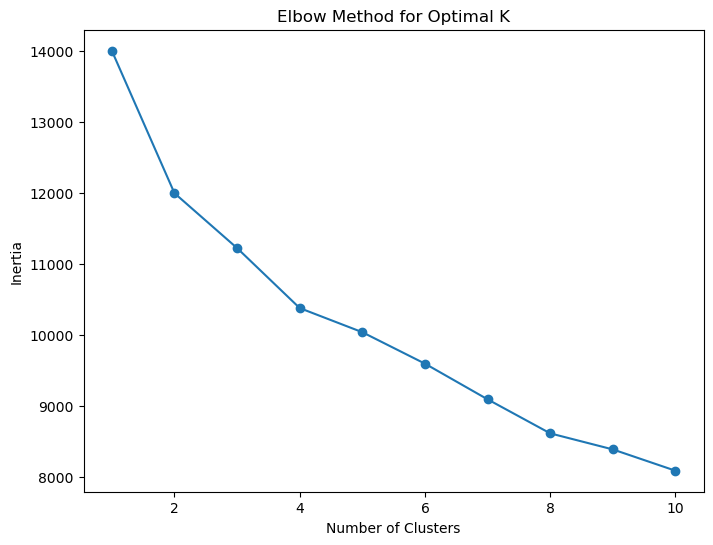

In [32]:
# Plot Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [47]:
# Fit the KMeans model with the chosen number of clusters (e.g., 4 clusters)
optimal_k = 6  # Choose based on the Elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)


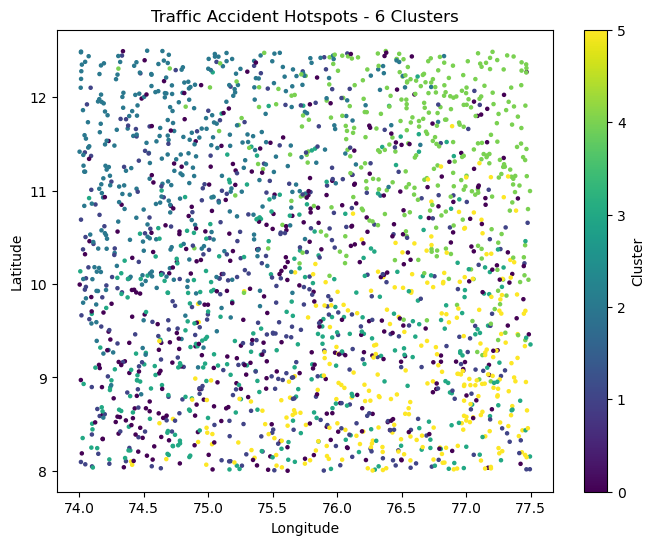

In [48]:
# Visualize the clusters (Latitude vs Longitude)
plt.figure(figsize=(8, 6))
plt.scatter(data['Longitude'], data['Latitude'], c=data['Cluster'], cmap='viridis', s=5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title(f'Traffic Accident Hotspots - {optimal_k} Clusters')
plt.colorbar(label='Cluster')
plt.show()

In [49]:
# Evaluate the clustering performance using silhouette score
silhouette_avg = silhouette_score(X_scaled, data['Cluster'])
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.10598310829171388


In [55]:
# Save the model and scaler as pickle files
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

with open('kmeans_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

with open('kmeans_label.pkl', 'wb') as label_file:
    pickle.dump(label_encoder, label_file)
print("Model and scaler saved successfully.")


Model and scaler saved successfully.


In [51]:
# Print the cluster centers
print(kmeans.cluster_centers_)


[[-0.24545258 -0.14917399  0.20102026  0.06844213 -0.92193925  0.42446764
   0.98807114]
 [-0.2747065  -0.23450314 -0.12907215 -0.10663963 -0.85832666  0.40988974
  -1.01207287]
 [ 0.8325775  -0.8630599   0.3687102  -0.06112196  0.70573358  0.06942987
  -0.27252382]
 [-0.56445373 -0.11791665 -0.99806435  0.42614711  0.76219798 -0.10990888
   0.35080128]
 [ 0.90667158  0.86688704 -0.25013699 -0.32274966 -0.01946181 -0.75407257
  -0.09962047]
 [-0.84576001  0.71901772  0.87402236  0.02115606  0.57189275 -0.15267964
   0.03562161]]
